NAME- KARTIKEYA GUPTA

### LETSGROWMORE INTERNSHIP BEGINNER LEVEL TASK-2

#### STOCK MARKET PREDICTION USING STACKEDLSTM

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import mean_squared_error

In [2]:
url="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
#Sorting the dataset with Date column values
from sklearn.preprocessing import MinMaxScaler
data['Date']=pd.to_datetime(data['Date'])
df=data.sort_values(by='Date')

In [8]:
df.reset_index(inplace=True)

In [9]:
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


Text(0.5, 1.0, 'Correlation Matrix')

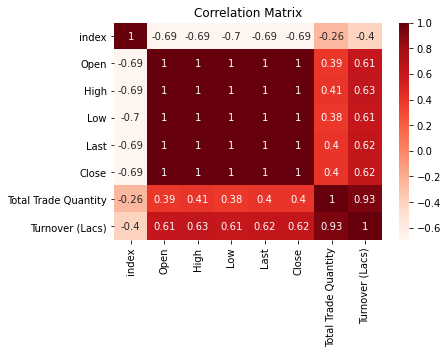

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),cmap="Reds",annot=True)
plt.title("Correlation Matrix")

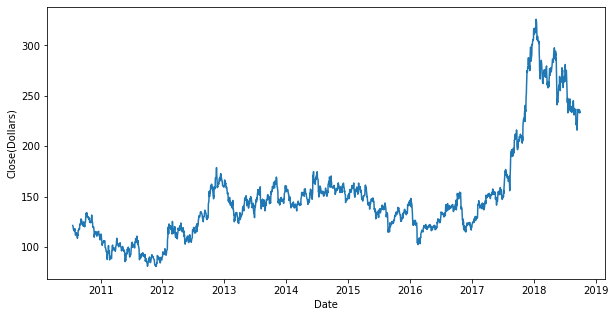

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['Close'])
plt.xlabel("Date",fontsize=10)
plt.ylabel("Close(Dollars)",fontsize=10)
plt.show()

In [12]:
df_close=df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [13]:
#Using the MinMaxScaler to transform the values between 0 and 1.
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

##### Preparing data for training and testing

In [14]:
train_data=df_close[0:int(len(df_close)*0.80),:]
test_data=df_close[int(len(df_close)*0.80):len(df_close),:1]

In [15]:
#traing data size
int(len(df_close)*0.80)

1628

In [16]:
#Testing data size
len(df_close)-int(len(df_close)*0.80)

407

In [17]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.24877451],
       [0.25245098],
       [0.24795752]])

In [18]:
test_data

array([[0.26633987],
       [0.25714869],
       [0.25735294],
       [0.24918301],
       [0.24611928],
       [0.23611111],
       [0.24162582],
       [0.24183007],
       [0.24775327],
       [0.24775327],
       [0.24121732],
       [0.23815359],
       [0.23672386],
       [0.23325163],
       [0.2559232 ],
       [0.24571078],
       [0.25490196],
       [0.25449346],
       [0.25245098],
       [0.24693627],
       [0.24448529],
       [0.22937092],
       [0.23917484],
       [0.24489379],
       [0.26041667],
       [0.26082516],
       [0.26756536],
       [0.26531863],
       [0.25388072],
       [0.28860294],
       [0.28676471],
       [0.27634804],
       [0.28431373],
       [0.28451797],
       [0.28267974],
       [0.28431373],
       [0.28982843],
       [0.29289216],
       [0.29452614],
       [0.28451797],
       [0.28594771],
       [0.29595588],
       [0.28921569],
       [0.28410948],
       [0.27982026],
       [0.2745098 ],
       [0.28288399],
       [0.290

In [19]:
#Since we have Time series Dataset, we are going to link the values of datasets to each data values
def create_dataset(dataset, time_step=1):
    x_data, y_data=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        x_data.append(a)
        y_data.append(dataset[i+time_step, 0])
    return np.array(x_data),np.array(y_data)
time_step=100
x_train, y_train= create_dataset(train_data, time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [20]:
print(x_train.shape), print(y_train.shape), print(x_test.shape), print(y_test.shape)

(1527, 100)
(1527,)
(306, 100)
(306,)


(None, None, None, None)

In [21]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

##### Model Building

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is that LSTM can store past important information and forget the information that is not.

LSTM has three gates:

The input gate: The input gate adds information to the cell state.

The forget gate: It removes the information that is no longer required by the model,

The output gate: Output gate at LSTM selects the information to be shown as output.

While implementing any LSTM, we should always reshape our x_train in 3_D, add 1 for the times step and another 1 is given to the LSTM.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [24]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
24/24 [==============================] - 66s 2s/step - loss: 0.0061 - val_loss: 0.0234
Epoch 2/50
24/24 [==============================] - 37s 2s/step - loss: 9.7578e-04 - val_loss: 0.0039
Epoch 3/50
24/24 [==============================] - 37s 2s/step - loss: 7.7520e-04 - val_loss: 0.0049
Epoch 4/50
24/24 [==============================] - 38s 2s/step - loss: 7.0379e-04 - val_loss: 0.0052
Epoch 5/50
24/24 [==============================] - 36s 1s/step - loss: 6.6009e-04 - val_loss: 0.0049
Epoch 6/50
24/24 [==============================] - 36s 2s/step - loss: 6.2466e-04 - val_loss: 0.0046
Epoch 7/50
24/24 [==============================] - 36s 2s/step - loss: 6.0513e-04 - val_loss: 0.0053
Epoch 8/50
24/24 [==============================] - 36s 1s/step - loss: 5.7507e-04 - val_loss: 0.0029
Epoch 9/50
24/24 [==============================] - 36s 2s/step - loss: 5.6995e-04 - val_loss: 0.0028
Epoch 10/50
24/24 [==============================] - 36s 2s/step - loss: 5.3835e-04 - 

In [25]:
#predicting using the trained model
train_prediction=model.predict(x_train)
test_prediction=model.predict(x_test)

In [26]:
train_prediction

array([[0.12952423],
       [0.12269235],
       [0.1236721 ],
       ...,
       [0.19703677],
       [0.21606666],
       [0.23945262]], dtype=float32)

In [27]:
#Scaling the predicted array back to original form
train_predict=scaler.inverse_transform(train_prediction)
test_predict=scaler.inverse_transform(test_prediction)

In [28]:
train_predict

array([[112.65753 ],
       [110.985085],
       [111.22493 ],
       ...,
       [129.1846  ],
       [133.84312 ],
       [139.568   ]], dtype=float32)

In [29]:
#Calculating RMSE performance metric
math.sqrt(mean_squared_error(y_test,test_prediction))

0.045803078830094414

##### Plotting

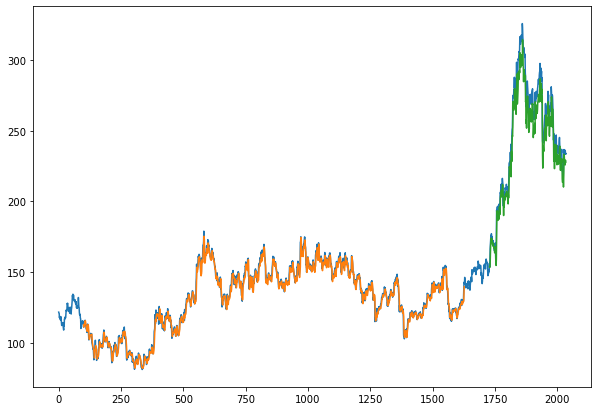

In [30]:
plt.figure(figsize=(10,7))
look_back=100
trainPredictplot=np.empty_like(df_close)
trainPredictplot[:,:]=np.nan
trainPredictplot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictplot=np.empty_like(df_close)
testPredictplot[:,:]=np.nan
testPredictplot[len(train_predict)+(look_back*2)+1:len(df_close)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictplot)
plt.plot(testPredictplot)
plt.show()

Blue indicates the Complete data,
Green indicates the predicted data, and
Orange indicates the train data.

In [31]:
df_close = df_close.reshape((-1))
next_no_of_days=30
def predict(next_no_of_days, model):
    prediction_list = df_close[-100:]
    
    for _ in range(next_no_of_days):
        x = prediction_list[-100:]
        x = x.reshape((1, 100, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[100-1:]
        
    return prediction_list
    
def predict_dates(next_no_of_days):
    last_date = df['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=next_no_of_days+1).tolist()
    return prediction_dates

forecast = predict(next_no_of_days, model)
forecast_dates = predict_dates(next_no_of_days)

In [34]:
forecast_predict=forecast.reshape(1,-1)
forecast_predict=scaler.inverse_transform(forecast_predict)
forecast_predict=forecast_predict.ravel()
fprices=pd.DataFrame()
fprices["forecast"] = pd.Series(list(forecast_predict))
fprices["Dates"]=pd.Series(list(forecast_dates))

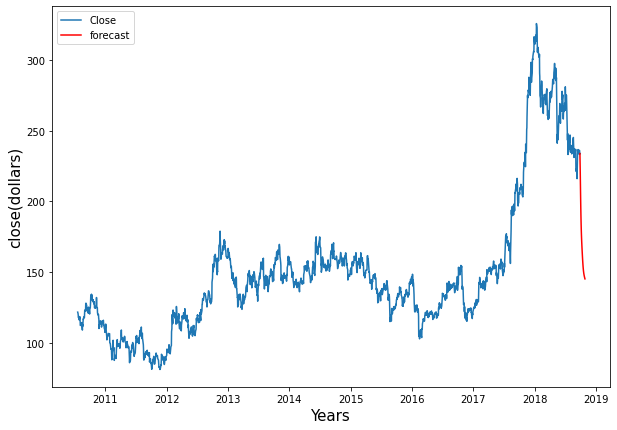

In [49]:
plt.figure(figsize=(10,7))
plt.plot("Date",'Close',data=df)
plt.plot("Dates","forecast",data=fprices,color='Red')
plt.xlabel("Years",fontsize=15)
plt.ylabel("close(dollars)",fontsize=15)
plt.legend()
plt.show()